<a href="https://colab.research.google.com/github/Karthika298/Heart-failure_Prediction-/blob/main/Heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import datetime
import sklearn
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, cohen_kappa_score, f1_score, precision_score, recall_score, roc_curve

## **Exploring the Dataset**:

In [2]:
df=pd.read_csv('/content/heart_failure_clinical_records_dataset (1).csv')

In [4]:
df.head()
#df.shape

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


The dataset contains **299 rows** and **13 columns.**

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

**Anaemia**: A value of **0** indicates the **absence of anaemia,** while **1** indicates **its presence.**

**Diabetes**: A value of **0** indicates the **absence of diabetes**, while **1** indicates its **presence**.

**High Blood Pressure:** A value of **0** indicates the **absence of high blood pressure**, while **1** indicates its **presence**.

**Smoking:** A value of **0** indicates **non-smoking**, while **1** indicates **smoking.**

**Sex:** A value of **0** represents **female**, while **1** represents **male**.

**DEATH_EVENT**: A value of **0** indicates that **heart failure is not the cause of death**, while **1** indicates that **it is**.






### **Distribution of Target Variable**

In [6]:
death_event_counts = df['DEATH_EVENT'].value_counts()
fig = px.pie(values=death_event_counts, names=death_event_counts.index,
             title='Distribution of DEATH_EVENT',
             labels={'labels': 'DEATH_EVENT', 'values': 'Count'},hole=0.3)
fig.show()

### Filtering out the number of males and females in Death_event.

In [7]:
# Filtering DataFrame for individuals who have experienced heart failure
survived_df = df[df['DEATH_EVENT'] == 1]

# Calculating counts of males and females in the death  group
survived_sex_counts = survived_df['sex'].value_counts().reset_index()
# survived_sex_counts.columns = ['sex', 'Count']
survived_sex_counts
# # Plotting the pie chart
# fig = px.pie(survived_sex_counts,
#              values='Count',
#              names='sex',
#              color='sex',
#              color_discrete_sequence=['blue', 'red'],
#              labels={'sex': 'Sex', 'Count': 'Count'},
#              title='Distribution of Survived Individuals by Sex',
#              hole=0.3)  # Adding a hole in the middle for better visualization

# fig.show()


,sex,count
0,1,62
1,0,34


* In the dataset, **96** individuals experienced **heart failure as the
cause of death**.Out of which **62** are males , and **34** are females.

* **203** individuals have a value of 0 in the DEATH_EVENT column, suggesting that **heart failure is not the cause of death for these individuals.**

In [8]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

### Distribution of Numerical columns

In [9]:

columns_to_plot = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
colors = ['#1f77b4',
    '#ff7f0e',
    '#2ca02c',
    '#d62728',
    '#9467bd',
    '#8c564b',]
fig = make_subplots(rows=3, cols=2, subplot_titles=columns_to_plot)

for i, (column, color) in enumerate(zip(columns_to_plot, colors), start=1):
    row = (i - 1) // 2 + 1
    col = (i - 1) % 2 + 1
    fig.add_trace(go.Histogram(x=df[column], name=column, marker_color=color), row=row, col=col)

fig.update_layout(height=800, width=1000, title_text="Distribution of Numerical columns", showlegend=True)
#fig.update_xaxes(title_text="Value")
fig.update_yaxes(title_text="Frequency")

fig.show()


Each histogram represents the distribution of values for a specific numerical column.

In [10]:
fig = px.violin(df, x='DEATH_EVENT', y='age', points="all", box=True,
                title='Violin Plot of Age by Death Event',
                labels={'DEATH_EVENT': 'Death Event', 'age': 'Age'},  color='DEATH_EVENT',color_discrete_map={0: 'green', 1: 'red'})

fig.update_layout(yaxis_title='Age')
fig.show()

In [11]:
min_value = df['age'].min()
max_value = df['age'].max()
max_value

95.0

This violin plot helps in understanding whether there are differences in age distribution between those who experienced a death event and those who did not.

 * The **width of the violins** represents the **density of ages** within each category of the 'DEATH_EVENT' variable.

The thick horizontal line inside each violin represents the **median age** for the corresponding category of the 'DEATH_EVENT' variable.

*   The age range for females spans from a **minimum of 40 years** to a **maximum of 90 years**, with a **median age of 60 years**
*  The age range for males spans from a **minimum of 42 years** to a **maximum of 95 years**, with a **median age of 65 years**

Individual data points beyond the whiskers of the violins are **outliers**. There **arent any outliers** in this specific category.



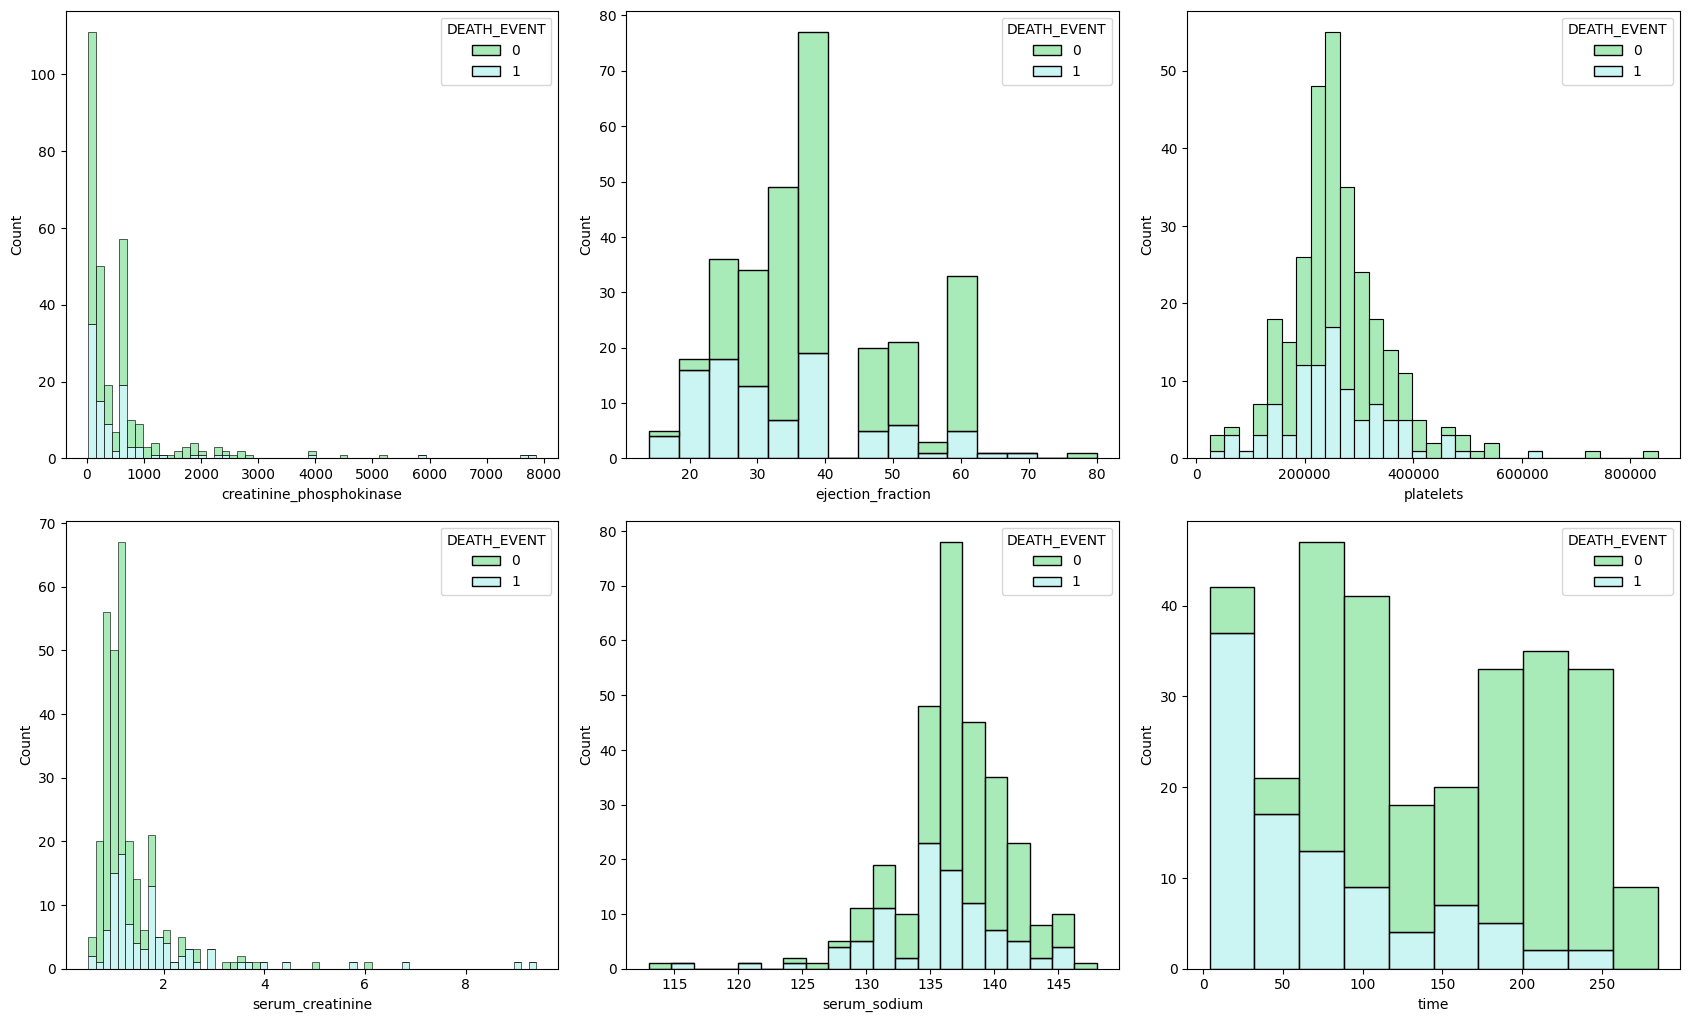

In [12]:
continuous_data = ["creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]
colors = ['#8de5a1','#b9f2f0']

plt.figure(figsize=(17, 15))
for j, con in enumerate(continuous_data):
    plt.subplot(3, 3, j+1)
    sns.histplot(data=df, x=con, hue="DEATH_EVENT", multiple="stack", palette=colors, kde=False)
    plt.xlabel(con)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


This visualization provides insights into how the distribution of each continuous variable differs between individuals who experienced a death event and those who did not.

* The **x-axis** represents the **values** of the continuous variables, while the **y-axis** represents the **count of occurrences**.
* The histograms are **stacked**, allowing for easy comparison of the **distribution of each continuous variable between the two categories** of 'DEATH_EVENT'

In [13]:

# Filtering the dataframe for men who smoke and have experienced a heart attack
men_smoking_death = df[(df['sex'] == 1) & (df['smoking'] == 1) & (df['DEATH_EVENT'] == 1)]
num_men_smoking_death = len(men_smoking_death)
print("Number of men who smoke and experienced a heart attack:", num_men_smoking_death)


Number of men who smoke and experienced a heart attack: 27


In [14]:


# Calculate the counts for each combination of smoking status and death event
counts = df.groupby(['smoking', 'DEATH_EVENT']).size()
labels = ['Non-smoker - No Death', 'Non-smoker - Death', 'Smoker - No Death', 'Smoker - Death']
colors = ['#66c2a5', '#abdda4', '#fc8d62', '#e6f598']
fig = go.Figure(data=[go.Pie(labels=labels, values=counts.values.ravel(), hole=0.4, marker=dict(colors=colors))])

fig.update_layout(title='Distribution of Smoking Status and Death Events',
                  legend=dict(orientation="h", x=1, y=1.1),
                  height=500, width=700)

fig.show()


This visualization provides a clear representation of the distribution of smoking status and death events.
* There were **137** individuals who did not smoke and did not experience a death event.
* **66** individuals who did not smoke experienced a death event.
* **66** individuals who smoke did not experience a death event.
* **30** individuals who smoke experienced a death event.

**Overall Observations**

The distribution of death events among smokers and non-smokers shows  the significant impact of smoking on mortality rates.
The majority of **non-smokers (137 individuals)** did not experience a death event, **suggesting a relatively lower mortality rate among non-smokers**.


In [15]:

counts = df.groupby(['high_blood_pressure', 'DEATH_EVENT']).size()
labels = ['Negative - No Death', 'Negative - Death', 'Posistive - No Death', 'Posistive - Death']
colors = ['#66c2a5', '#abdda4', '#fc8d62', '#e6f598']
fig = go.Figure(data=[go.Pie(labels=labels, values=counts.values.ravel(), hole=0.4, marker=dict(colors=colors))])
fig.update_layout(title='Distribution of High Blood Pressure and Death Events',
                  legend=dict(orientation="h", x=1, y=1.1),
                  height=500, width=700)
fig.show()

* **137** individuals without high blood pressure did not experience a death event.
* **57** individuals without high blood pressure experienced a death event.
* **66** individuals with high blood pressure did not experience a death event.
* **39** individuals with high blood pressure experienced a death event.

**Overall observations**

**137 individuals without high blood pressure** did not experience a death event, indicating a **relatively lower mortality rate** in this group.

However, **57 individuals without high blood pressure** experienced a **death event**, suggesting that **the absence of high blood pressure does not guarantee immunity from mortality.**

While high blood pressure appears to be associated with a higher risk of mortality compared to its absence, not all individuals with high blood pressure experienced a death event.

In [16]:

# Calculate the correlation matrix
correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.index,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu',text_auto='.2f')


# fig.update_traces(text=correlation_matrix.values,
#                   textfont=dict(color='white'),
#                   selector=dict(type='RdBu'))

fig.update_layout(title='Correlation Plot between Features',
                  width=800, height=600,
                  coloraxis_colorbar=dict(title='Correlation'),
                  coloraxis_colorbar_len=0.75)

fig.show()



We observe a positive correlation between the occurrence of death events (DEATH_EVENT) and higher levels of serum creatinine and age. Additionally, there is a negative correlation between death events and time, ejection fraction, and serum sodium.

## **Data modeling and evaluation**

In [17]:
X = df[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","serum_sodium","time"]] # Taking only the continous variable for data modelling
y = df["DEATH_EVENT"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### We explore the performance of various classification algorithms to predict the occurrence of heart failure based on the data. The following classification models were implemented and evaluated:

### **`Random Forest Classifier`**

In [20]:
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train,y_train)
end=datetime.datetime.now()

y_pred_train=forest.predict(X_train)
y_pred_test=forest.predict(X_test)
y_prediction_values_train=forest.predict_proba(X_train)
y_prediction_values_test=forest.predict_proba(X_test)

In [21]:
rfc_acc_train=accuracy_score(y_train,y_pred_train)*100
rfc_acc_test=accuracy_score(y_test,y_pred_test)*100
rfc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
rfc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
rfc_f1_train=f1_score(y_train, y_pred_train, average='macro')
rfc_f1_test=f1_score(y_test, y_pred_test, average='macro')
rfc_prec_train=precision_score(y_train, y_pred_train)
rfc_prec_test=precision_score(y_test, y_pred_test)
rfc_recall_train=recall_score(y_train, y_pred_train)
rfc_recall_test=recall_score(y_test, y_pred_test)
kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa_train=kappa_train
kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa_test=kappa_test

rfc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
rfc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[31  4]
 [10 15]]
Classification Report:
               precision    recall  f1-score   support

           0     0.7561    0.8857    0.8158        35
           1     0.7895    0.6000    0.6818        25

    accuracy                         0.7667        60
   macro avg     0.7728    0.7429    0.7488        60
weighted avg     0.7700    0.7667    0.7600        60



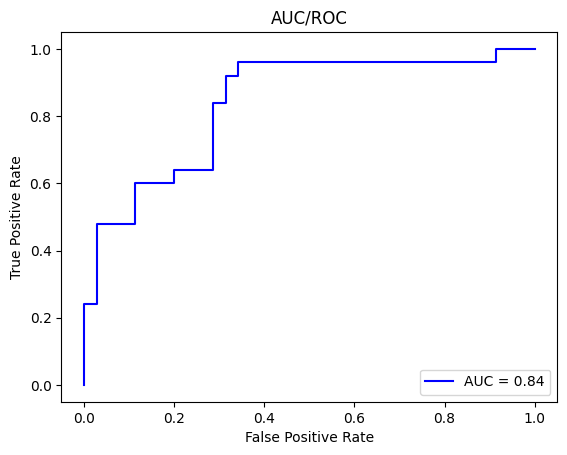

In [22]:
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_1=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

The **ROC curve** is a graphical representation between the **true positive rate (TPR)** and the **false positive rate (FPR)** for different threshold values.
* The **AUC** quantifies the overall performance of the classification model, with higher values indicating better discrimination between positive and negative classes.
* An AUC value close to 1 suggests excellent predictive performance, while a value closer to 0.5 indicates random guessing.

### **K-Nearest Neighbors (KNN)**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
y_pred_test=KNN.predict(X_test)
y_pred_train=KNN.predict(X_train)
y_prediction_values_train=KNN.predict_proba(X_train)
y_prediction_values_test=KNN.predict_proba(X_test)


In [24]:
knn_acc_train=accuracy_score(y_train,y_pred_train)*100
knn_acc_test=accuracy_score(y_test,y_pred_test)*100
knn_mcc_train=matthews_corrcoef(y_train, y_pred_train)
knn_mcc_test=matthews_corrcoef(y_test, y_pred_test)
knn_f1_train=f1_score(y_train, y_pred_train, average='macro')
knn_f1_test=f1_score(y_test, y_pred_test, average='macro')
knn_prec_train=precision_score(y_train, y_pred_train)
knn_prec_test=precision_score(y_test, y_pred_test)
knn_recall_train=recall_score(y_train, y_pred_train)
knn_recall_test=recall_score(y_test, y_pred_test)
knn_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
knn_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
knn_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
knn_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])


### **Support Vector Machine (SVM)**

In [25]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train,y_train)
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)
y_prediction_values_train=model.predict_proba(X_train)
y_prediction_values_test=model.predict_proba(X_test)

In [26]:
svc_acc_train=accuracy_score(y_train,y_pred_train)*100
svc_acc_test=accuracy_score(y_test,y_pred_test)*100
svc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
svc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
svc_f1_train=f1_score(y_train, y_pred_train, average='macro')
svc_f1_test=f1_score(y_test, y_pred_test, average='macro')
svc_prec_train=precision_score(y_train, y_pred_train)
svc_prec_test=precision_score(y_test, y_pred_test)
svc_recall_train=recall_score(y_train, y_pred_train)
svc_recall_test=recall_score(y_test, y_pred_test)
svc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
svc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
svc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
svc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])


### **Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_test=lr.predict(X_test)
y_pred_train=lr.predict(X_train)
y_prediction_values_train=lr.predict_proba(X_train)
y_prediction_values_test=lr.predict_proba(X_test)

In [28]:
lr_acc_train=accuracy_score(y_train,y_pred_train)*100
lr_acc_test=accuracy_score(y_test,y_pred_test)*100
lr_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lr_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lr_f1_train=f1_score(y_train, y_pred_train, average='macro')
lr_f1_test=f1_score(y_test, y_pred_test, average='macro')
lr_prec_train=precision_score(y_train, y_pred_train)
lr_prec_test=precision_score(y_test, y_pred_test)
lr_recall_train=recall_score(y_train, y_pred_train)
lr_recall_test=recall_score(y_test, y_pred_test)
lr_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
lr_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
lr_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
lr_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])


### **XGBoost**

In [29]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
y_prediction_values_train=xgb.predict_proba(X_train)
y_prediction_values_test=xgb.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[15:55:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.




In [30]:
xgb_acc_train=accuracy_score(y_train,y_pred_train)*100
xgb_acc_test=accuracy_score(y_test,y_pred_test)*100
xgb_mcc_train=matthews_corrcoef(y_train, y_pred_train)
xgb_mcc_test=matthews_corrcoef(y_test, y_pred_test)
xgb_f1_train=f1_score(y_train, y_pred_train, average='macro')
xgb_f1_test=f1_score(y_test, y_pred_test, average='macro')
xgb_prec_train=precision_score(y_train, y_pred_train)
xgb_prec_test=precision_score(y_test, y_pred_test)
xgb_recall_train=recall_score(y_train, y_pred_train)
xgb_recall_test=recall_score(y_test, y_pred_test)
xgb_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
xgb_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
xgb_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
xgb_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])


### **Gaussian Naive Bayes**

In [31]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prediction_values_train=clf.predict_proba(X_train)
y_prediction_values_test=clf.predict_proba(X_test)

In [32]:
clf_acc_train=accuracy_score(y_train,y_pred_train)*100
clf_acc_test=accuracy_score(y_test,y_pred_test)*100
clf_mcc_train=matthews_corrcoef(y_train, y_pred_train)
clf_mcc_test=matthews_corrcoef(y_test, y_pred_test)
clf_f1_train=f1_score(y_train, y_pred_train, average='macro')
clf_f1_test=f1_score(y_test, y_pred_test, average='macro')
clf_prec_train=precision_score(y_train, y_pred_train)
clf_prec_test=precision_score(y_test, y_pred_test)
clf_recall_train=recall_score(y_train, y_pred_train)
clf_recall_test=recall_score(y_test, y_pred_test)
clf_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
clf_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
clf_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
clf_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])


### **Multi-Layer Perceptron (MLP)**

In [33]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train, y_train)

y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)
y_prediction_values_train=mlp.predict_proba(X_train)
y_prediction_values_test=mlp.predict_proba(X_test)

In [34]:
mlp_acc_train=accuracy_score(y_train,y_pred_train)*100
mlp_acc_test=accuracy_score(y_test,y_pred_test)*100
mlp_mcc_train=matthews_corrcoef(y_train, y_pred_train)
mlp_mcc_test=matthews_corrcoef(y_test, y_pred_test)
mlp_f1_train=f1_score(y_train, y_pred_train, average='macro')
mlp_f1_test=f1_score(y_test, y_pred_test, average='macro')
mlp_prec_train=precision_score(y_train, y_pred_train)
mlp_prec_test=precision_score(y_test, y_pred_test)
mlp_recall_train=recall_score(y_train, y_pred_train)
mlp_recall_test=recall_score(y_test, y_pred_test)
mlp_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
mlp_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
mlp_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
mlp_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])


### **ExtraTreesClassifier**

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
etc.fit(X_train, y_train)


y_pred_train = etc.predict(X_train)
y_pred_test = etc.predict(X_test)
y_prediction_values_train=etc.predict_proba(X_train)
y_prediction_values_test=etc.predict_proba(X_test)

In [36]:
etc_acc_train=accuracy_score(y_train,y_pred_train)*100
etc_acc_test=accuracy_score(y_test,y_pred_test)*100
etc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
etc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
etc_f1_train=f1_score(y_train, y_pred_train, average='macro')
etc_f1_test=f1_score(y_test, y_pred_test, average='macro')
etc_prec_train=precision_score(y_train, y_pred_train)
etc_prec_test=precision_score(y_test, y_pred_test)
etc_recall_train=recall_score(y_train, y_pred_train)
etc_recall_test=recall_score(y_test, y_pred_test)

etc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

etc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

etc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
etc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])


### **DecisionTreeClassifier**

In [37]:

from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
dtc.fit(X_train, y_train)
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)
y_prediction_values_train=dtc.predict_proba(X_train)
y_prediction_values_test=dtc.predict_proba(X_test)

In [38]:
dtc_acc_train=accuracy_score(y_train,y_pred_train)*100
dtc_acc_test=accuracy_score(y_test,y_pred_test)*100
dtc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
dtc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
dtc_f1_train=f1_score(y_train, y_pred_train, average='macro')
dtc_f1_test=f1_score(y_test, y_pred_test, average='macro')
dtc_prec_train=precision_score(y_train, y_pred_train)
dtc_prec_test=precision_score(y_test, y_pred_test)
dtc_recall_train=recall_score(y_train, y_pred_train)
dtc_recall_test=recall_score(y_test, y_pred_test)
dtc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
dtc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
dtc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
dtc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])


### **Linear Discriminant Analysis**

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


y_pred_train =lda.predict(X_train)
y_pred_test = lda.predict(X_test)

y_prediction_values_train=lda.predict_proba(X_train)
y_prediction_values_test=lda.predict_proba(X_test)

In [40]:
lda_acc_train=accuracy_score(y_train,y_pred_train)*100
lda_acc_test=accuracy_score(y_test,y_pred_test)*100
lda_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lda_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lda_f1_train=f1_score(y_train, y_pred_train, average='macro')
lda_f1_test=f1_score(y_test, y_pred_test, average='macro')
lda_prec_train=precision_score(y_train, y_pred_train)
lda_prec_test=precision_score(y_test, y_pred_test)
lda_recall_train=recall_score(y_train, y_pred_train)
lda_recall_test=recall_score(y_test, y_pred_test)

lda_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

lda_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


lda_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
lda_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])


In [41]:
data_train = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
         'Accuracy_train':[rfc_acc_train,knn_acc_train,svc_acc_train,lr_acc_train,xgb_acc_train,clf_acc_train,mlp_acc_train,etc_acc_train,dtc_acc_train,lda_acc_train],
       'MCC Score_train':[rfc_mcc_train,knn_mcc_train,svc_mcc_train,lr_mcc_train,xgb_mcc_train,clf_mcc_train,mlp_mcc_train,etc_mcc_train,dtc_mcc_train,lda_mcc_train],
       'F1 Score_train':[rfc_f1_train,knn_f1_train,svc_f1_train,lr_f1_train,xgb_f1_train,clf_f1_train,mlp_f1_train,etc_f1_train,dtc_f1_train,lda_f1_train],
       'Precision_train':[rfc_prec_train,knn_prec_train,svc_prec_train,lr_prec_train,xgb_prec_train,clf_prec_train,mlp_prec_train,etc_prec_train,dtc_prec_train,lda_prec_train],
       'Recall_train':[rfc_recall_train,knn_recall_train,svc_recall_train,lr_recall_train,xgb_recall_train,clf_recall_train,mlp_recall_train,etc_recall_train,dtc_recall_train,lda_recall_train],
         'kappa Score_train':[rfc_kappa_train,knn_kappa_train,svc_kappa_train,lr_kappa_train,xgb_kappa_train,clf_kappa_train,mlp_kappa_train,etc_kappa_train,dtc_kappa_train,lda_kappa_train],
       'AUC/ROC_train':[rfc_auc_train,knn_auc_train,svc_auc_train,lr_auc_train,xgb_auc_train,clf_auc_train,mlp_auc_train,etc_auc_train,dtc_auc_train,lda_auc_train]}
df_train = pd.DataFrame(data_train)

In [42]:
df_train

,Model,Accuracy_train,MCC Score_train,F1 Score_train,Precision_train,Recall_train,kappa Score_train,AUC/ROC_train
0,RFC,94.979079,0.879779,0.939889,0.915493,0.915493,0.879779,0.994551
1,KNN,87.866109,0.704357,0.851639,0.818182,0.760563,0.703436,0.952716
2,SVC,89.539749,0.750591,0.875274,0.819444,0.830986,0.750553,0.961854
3,LR,84.518828,0.622439,0.810711,0.757576,0.704225,0.621625,0.913062
4,XGB,99.581590,0.990071,0.995011,0.986111,1.000000,0.990022,1.000000
5,GNB,79.497908,0.476031,0.728893,0.720000,0.507042,0.463266,0.884809
6,MLP,94.142259,0.862657,0.930970,0.880000,0.929577,0.861986,0.987508
7,ETC,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,DTC,95.397490,0.888848,0.944207,0.941176,0.901408,0.888436,0.988305
9,LDA,85.774059,0.654284,0.826812,0.776119,0.732394,0.653741,0.912894


In [43]:
data_test = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
             'Accuracy_test': [rfc_acc_test,knn_acc_test,svc_acc_test,lr_acc_test,xgb_acc_test,clf_acc_test,mlp_acc_test,etc_acc_test,dtc_acc_test,lda_acc_test],
             'MCC Score_test':[rfc_mcc_test,knn_mcc_test,svc_mcc_test,lr_mcc_test,xgb_mcc_test,clf_mcc_test,mlp_mcc_test,etc_mcc_test,dtc_mcc_test,lda_mcc_test],
              'F1 Score_test':[rfc_f1_test,knn_f1_test,svc_f1_test,lr_f1_test,xgb_f1_test,clf_f1_test,mlp_f1_test,etc_f1_test,dtc_f1_test,lda_f1_test],
               'Precision_test':[rfc_prec_test,knn_prec_test,svc_prec_test,lr_prec_test,xgb_prec_test,clf_prec_test,mlp_prec_test,etc_prec_test,dtc_prec_test,lda_prec_test],
             'Recall_test':[rfc_recall_test,knn_recall_test,svc_recall_test,lr_recall_test,xgb_recall_test,clf_recall_test,mlp_recall_test,etc_recall_test,dtc_recall_test,lda_recall_test],
              'kappa Score_test':[rfc_kappa_test,knn_kappa_test,svc_kappa_test,lr_kappa_test,xgb_kappa_test,clf_kappa_test,mlp_kappa_test,etc_kappa_test,dtc_kappa_test,lda_kappa_test],
               'AUC/ROC_test':[rfc_auc_test,knn_auc_test,svc_auc_test,lr_auc_test,xgb_auc_test,clf_auc_test,mlp_auc_test,etc_auc_test,dtc_auc_test,lda_auc_test]}

df_test = pd.DataFrame(data_test)

In [45]:
df_test

,Model,Accuracy_test,MCC Score_test,F1 Score_test,Precision_test,Recall_test,kappa Score_test,AUC/ROC_test
0,RFC,76.666667,0.514773,0.748804,0.789474,0.60,0.502959,0.838857
1,KNN,71.666667,0.405741,0.691936,0.722222,0.52,0.392857,0.799429
2,SVC,75.000000,0.479512,0.728179,0.777778,0.56,0.464286,0.842286
3,LR,80.000000,0.605058,0.775000,0.933333,0.56,0.563636,0.843429
4,XGB,76.666667,0.513858,0.753231,0.761905,0.64,0.508772,0.870857
5,GNB,71.666667,0.438439,0.657143,0.900000,0.36,0.362500,0.835429
6,MLP,75.000000,0.484165,0.722136,0.812500,0.52,0.457831,0.845714
7,ETC,76.666667,0.526986,0.737500,0.866667,0.52,0.490909,0.864000
8,DTC,73.333333,0.446161,0.722222,0.695652,0.64,0.445087,0.714857
9,LDA,78.333333,0.560612,0.759185,0.875000,0.56,0.530120,0.841143


### **Overall Conclusions**

**Logistic Regression**

* Demonstrated the highest accuracy of **80.00%** with a substantial MCC score of **0.61**.
* High precision and recall, leading to a balanced F1 score.
* **AUC score suggests good discrimination power**.

In summary, **logistic regression**, **XGBoost, ETC,Support Vector Classifier, and Linear Discriminant Analysis** appear to be the top-performing models based on their high accuracy, MCC score, and balanced F1 score, precision, and recall.These models demonstrate good discrimination ability as seen by their high AUC scores.